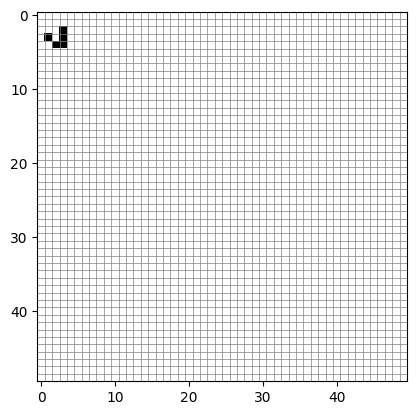

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def create_grid(rows, cols):
    return np.zeros((rows, cols), dtype=int)

def update_grid(grid):
    rows, cols = grid.shape
    new_grid = grid.copy()

    for row in range(rows):
        for col in range(cols):
            live_neighbors = np.sum(grid[row-1:row+2, col-1:col+2]) - grid[row, col]

            if grid[row, col] == 1:
                if live_neighbors < 2 or live_neighbors > 3:
                    new_grid[row, col] = 0
            else:
                if live_neighbors == 3:
                    new_grid[row, col] = 1

    return new_grid

def initialize_grid(grid, initial_live_cells):
    for (row, col) in initial_live_cells:
        grid[row, col] = 1
    return grid

def display_grid(grid, interval=200):
    fig, ax = plt.subplots()
    img = ax.imshow(grid, cmap='binary', interpolation='none')

    def update(data):
        img.set_data(data)
        return img,

    def data_gen():
        nonlocal grid
        while True:
            grid = update_grid(grid)
            yield grid

    ax.set_xticks(np.arange(-0.5, grid.shape[1], 1), minor=True)
    ax.set_yticks(np.arange(-0.5, grid.shape[0], 1), minor=True)
    ax.grid(which="minor", color="gray", linestyle='-', linewidth=0.5)
    ax.tick_params(which="minor", size=0)

    ani = animation.FuncAnimation(fig, update, frames=data_gen, interval=interval, blit=True, cache_frame_data=False)
    plt.show()
    return ani

def main():
    rows, cols = 50, 50
    grid = create_grid(rows, cols)

    initial_live_cells = [
        (1, 2), (2, 3), (3, 1), (3, 2), (3, 3)
    ]

    grid = initialize_grid(grid, initial_live_cells)
    ani = display_grid(grid)

if __name__ == "__main__":
    main()
